## <font color='orangered'>Testando o **Prophet** com a base do blog Cinetour - Viagem de Cinema</font>

**Prophet** é considerada uma das bibliotecas mais robustas para previsões de séries temporais. Vamos testá-la.

## <font color='blue'>Passo a passo</font>

**Parte 1:** Instalando o Prophet e carregando a biblioteca

In [1]:
#pip install prophet

In [2]:
# Pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Lendo a base de dados
df = pd.read_csv('dados/VC-ST_mes.csv', sep=';', parse_dates = ['Meses'], index_col = 0, squeeze = True)
df.head()

Meses
2010-06-01     33
2010-07-01    244
2010-08-01    166
2010-09-01    196
2010-10-01    347
Name: #Acessos, dtype: int64

In [4]:
df.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 153 entries, 2010-06-01 to 2023-02-01
Series name: #Acessos
Non-Null Count  Dtype
--------------  -----
153 non-null    int64
dtypes: int64(1)
memory usage: 2.4 KB


In [5]:
df.describe()

count      153.000000
mean      7183.326797
std       5994.375078
min         33.000000
25%       3818.000000
50%       5457.000000
75%       7941.000000
max      38726.000000
Name: #Acessos, dtype: float64

In [6]:
df = pd.DataFrame({'ds': df.index, 'y': df.values})
df.head(1)

,ds,y
0,2010-06-01,33


In [7]:
# Separando os últimos 50 meses como uma base de validação
treino = df[:141]
teste = df[141:]

In [8]:
teste.head(12)

,ds,y
141,2022-03-01,2835
142,2022-04-01,2888
143,2022-05-01,3418
144,2022-06-01,2783
145,2022-07-01,2857
146,2022-08-01,4619
147,2022-09-01,5207
148,2022-10-01,5825
149,2022-11-01,7269
150,2022-12-01,5065


**Parte 2:** Criando o modelo com Prophet 

In [9]:
modelo = Prophet(seasonality_mode = 'multiplicative')
modelo.fit(treino)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [10]:
df_previsoes = pd.DataFrame({'ds': teste['ds'].values})
df_previsoes

,ds
0,2022-03-01
1,2022-04-01
2,2022-05-01
3,2022-06-01
4,2022-07-01
5,2022-08-01
6,2022-09-01
7,2022-10-01
8,2022-11-01
9,2022-12-01


In [11]:
pred = modelo.predict(df_previsoes)

In [12]:
pred[['ds', 'yhat_lower' , 'yhat', 'yhat_upper']].tail(12)

,ds,yhat_lower,yhat,yhat_upper
0,2022-03-01,-3454.849374,3209.847735,9875.105917
1,2022-04-01,-2822.692879,3656.203592,9944.988420
2,2022-05-01,-3079.930293,3295.535582,10017.840305
3,2022-06-01,-3751.876575,2518.670767,9375.258943
4,2022-07-01,-4218.488294,2068.794684,8316.264894
5,2022-08-01,-2786.306188,3412.162592,9724.942891
6,2022-09-01,-3685.874177,2882.329764,9460.015227
7,2022-10-01,-4768.380049,1883.197080,8292.976678
8,2022-11-01,-3937.442312,2689.606050,8786.441061
9,2022-12-01,-3825.257289,2802.613182,9938.984906


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [14]:
rmse = sqrt(mean_squared_error(teste.y, pred.yhat))
print(rmse)

2541.003710801039


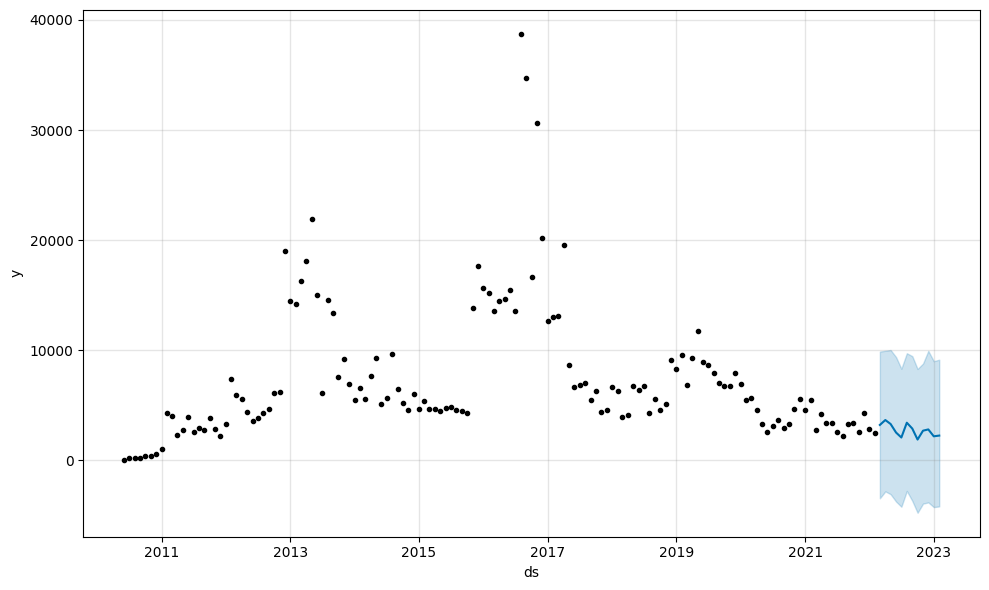

In [15]:
modelo.plot(pred);

In [16]:
# Próximo passo: cross-validation y tuning de hiperparâmetros

In [17]:
modelo2 = Prophet(seasonality_mode = 'additive')
modelo2.fit(treino)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [18]:
pred2 = modelo2.predict(df_previsoes)

In [19]:
pred2[['ds', 'yhat_lower' , 'yhat', 'yhat_upper']].tail(12)

,ds,yhat_lower,yhat,yhat_upper
0,2022-03-01,-3402.079244,3223.902796,9991.016608
1,2022-04-01,-2647.780532,4193.372301,10652.193449
2,2022-05-01,-2712.688533,3934.538984,10429.083595
3,2022-06-01,-4217.874697,2190.708709,8343.103147
4,2022-07-01,-5286.792742,1272.435496,7596.720959
5,2022-08-01,-2423.542265,3775.406827,9841.838440
6,2022-09-01,-3309.166642,2898.891330,9183.671808
7,2022-10-01,-5383.508526,1116.559938,7725.070512
8,2022-11-01,-3789.083396,2829.067377,10002.742580
9,2022-12-01,-2977.962947,3775.203024,9856.938652


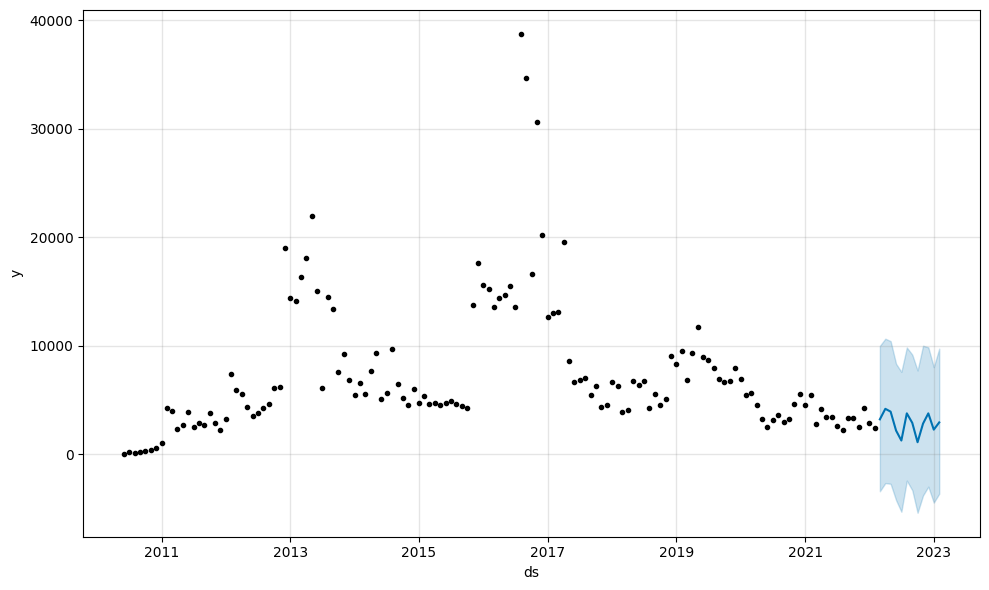

In [20]:
modelo2.plot(pred2);

In [21]:
index_col=['Meses']

In [22]:
resultados = pd.DataFrame({
    'Prev.Aditivo': pred2.yhat, 
    'Prev.Multiplicativo': pred.yhat,
    })

resultados.head(12)

,Prev.Aditivo,Prev.Multiplicativo
0,3223.902796,3209.847735
1,4193.372301,3656.203592
2,3934.538984,3295.535582
3,2190.708709,2518.670767
4,1272.435496,2068.794684
5,3775.406827,3412.162592
6,2898.891330,2882.329764
7,1116.559938,1883.197080
8,2829.067377,2689.606050
9,3775.203024,2802.613182


In [24]:
df_comp = pd.concat([df, resultados], ignore_index=True)

<Axes: >

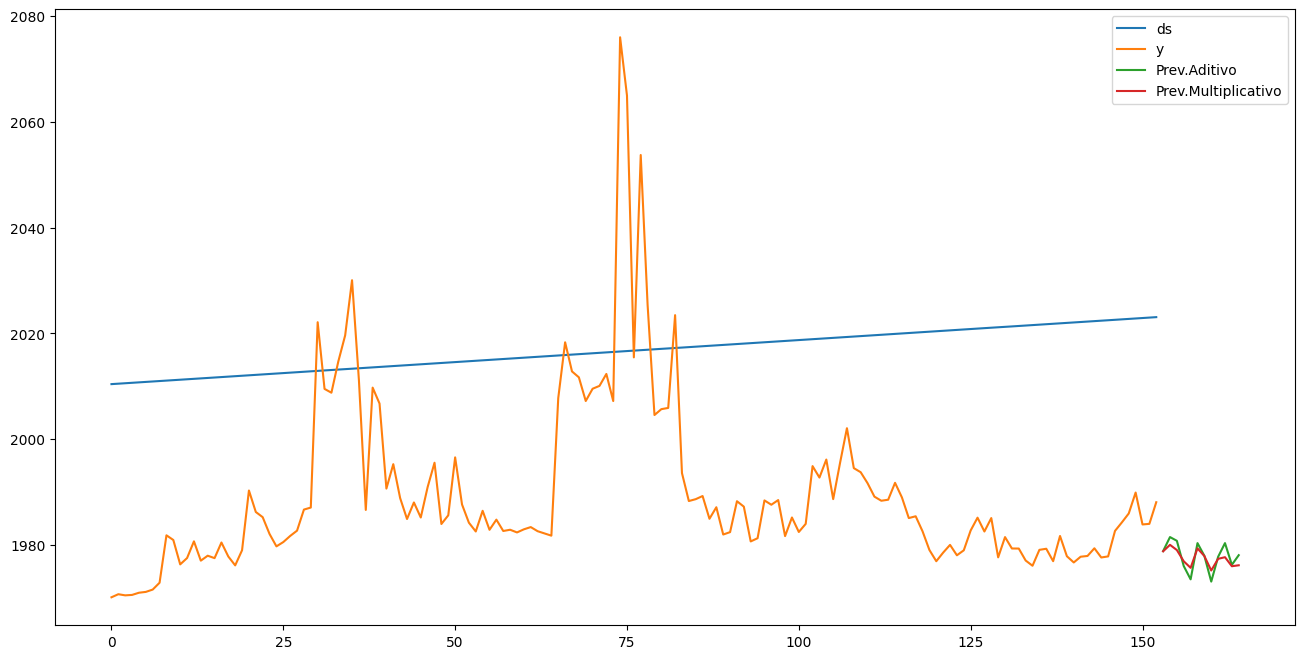

In [25]:
df_comp.plot(figsize = (16, 8))

In [26]:
# Próximos passos: cross-validaion e tuning de hiperparâmetros